In [17]:
#importing the necessary libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df=pd.read_csv('data/UCI_Credit_Card.csv')
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [18]:
#dropping the id column
df=df.drop('ID',axis=1)

In [19]:
df.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [20]:
#dividing into dependent and independent varaibles
X=df.drop('def_pay',axis=1)
y=df[['def_pay']]

In [21]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,2,2,26,-1,2,0,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,2,2,34,0,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,2,2,1,37,0,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [22]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  30000 non-null  float64
 1   SEX        30000 non-null  int64  
 2   EDUCATION  30000 non-null  int64  
 3   MARRIAGE   30000 non-null  int64  
 4   AGE        30000 non-null  int64  
 5   PAY_1      30000 non-null  int64  
 6   PAY_2      30000 non-null  int64  
 7   PAY_3      30000 non-null  int64  
 8   PAY_4      30000 non-null  int64  
 9   PAY_5      30000 non-null  int64  
 10  PAY_6      30000 non-null  int64  
 11  BILL_AMT1  30000 non-null  float64
 12  BILL_AMT2  30000 non-null  float64
 13  BILL_AMT3  30000 non-null  float64
 14  BILL_AMT4  30000 non-null  float64
 15  BILL_AMT5  30000 non-null  float64
 16  BILL_AMT6  30000 non-null  float64
 17  PAY_AMT1   30000 non-null  float64
 18  PAY_AMT2   30000 non-null  float64
 19  PAY_AMT3   30000 non-null  float64
 20  PAY_AM

In [23]:
#from the EDA its clear that there are outliers in LIMIT_BAL,'BILL_AMT1', 'BILL_AMT2',
      # 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
      # 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'
X_outliers=X[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
#X_outliers=X.columns[X.dtypes=='float64']

In [24]:
#Handling outliers
import numpy as np

upper_limit=[]
lower_limit=[]
for i in X_outliers.columns:
    Q1=np.percentile(X_outliers[i],25)
    Q2=np.percentile(X_outliers[i],50)
    Q3=np.percentile(X_outliers[i],75)
    IQR=Q3-Q1
    UL=Q3+IQR*1.5
    LL=Q1-IQR*1.5
    upper_limit.append(UL)
    lower_limit.append(LL)         
    print(f'Upper limit of {i} is {UL}')
    print(f'Lower limit of {i} is {LL}')

Upper limit of LIMIT_BAL is 525000.0
Lower limit of LIMIT_BAL is -235000.0
Upper limit of BILL_AMT1 is 162389.375
Lower limit of BILL_AMT1 is -91739.625
Upper limit of BILL_AMT2 is 155538.5
Lower limit of BILL_AMT2 is -88547.5
Upper limit of BILL_AMT3 is 146412.5
Lower limit of BILL_AMT3 is -83581.5
Upper limit of BILL_AMT4 is 132774.875
Lower limit of BILL_AMT4 is -75942.125
Upper limit of BILL_AMT5 is 122831.75
Lower limit of BILL_AMT5 is -70878.25
Upper limit of BILL_AMT6 is 121111.625
Lower limit of BILL_AMT6 is -70657.375
Upper limit of PAY_AMT1 is 11015.0
Lower limit of PAY_AMT1 is -5009.0
Upper limit of PAY_AMT2 is 11250.5
Lower limit of PAY_AMT2 is -5417.5
Upper limit of PAY_AMT3 is 10677.5
Lower limit of PAY_AMT3 is -5782.5
Upper limit of PAY_AMT4 is 9589.125
Lower limit of PAY_AMT4 is -5279.875
Upper limit of PAY_AMT5 is 9700.0
Lower limit of PAY_AMT5 is -5416.0
Upper limit of PAY_AMT6 is 9823.375
Lower limit of PAY_AMT6 is -5705.625


In [25]:
j=0
for i in X_outliers.columns:
    X_outliers[i]=np.where(X_outliers[i]>upper_limit[j],upper_limit[j],np.where(X_outliers[i]<lower_limit[j],lower_limit[j],X_outliers[i]))
    j=j+1

C:\Users\ollak\AppData\Local\Temp\ipykernel_19124\1938934695.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_outliers[i]=np.where(X_outliers[i]>upper_limit[j],upper_limit[j],np.where(X_outliers[i]<lower_limit[j],lower_limit[j],X_outliers[i]))


In [26]:
X[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]=X_outliers[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]

<Axes: >

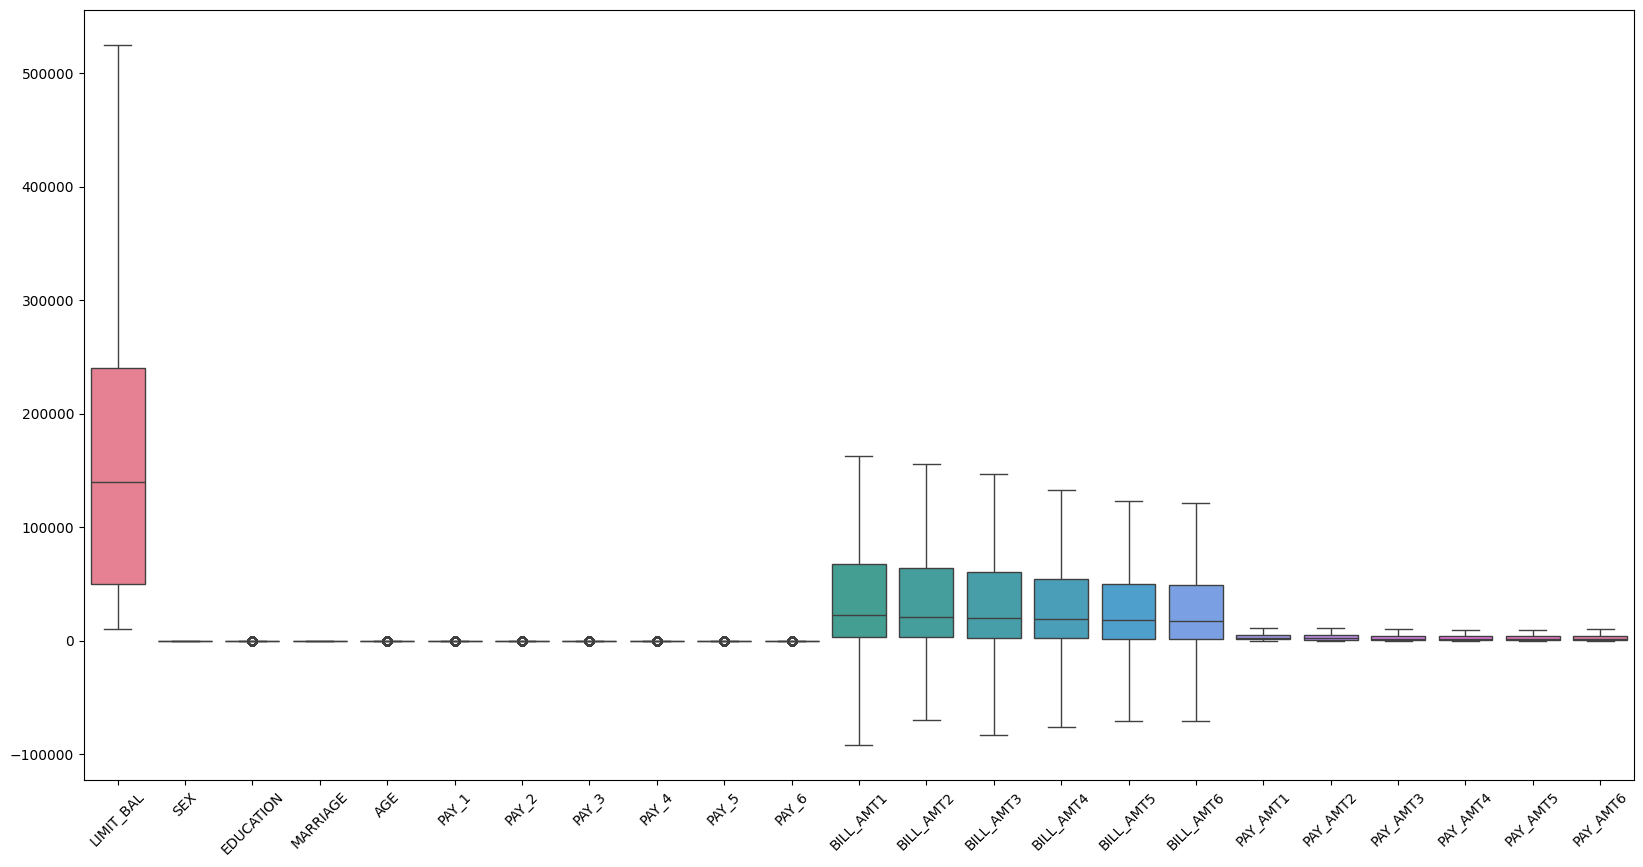

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
#replotting the box plot to check for outliers
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.boxplot(data=X)

All the outliers are handled .

In [28]:
X.dtypes

LIMIT_BAL    float64
SEX            int64
EDUCATION      int64
MARRIAGE       int64
AGE            int64
PAY_1          int64
PAY_2          int64
PAY_3          int64
PAY_4          int64
PAY_5          int64
PAY_6          int64
BILL_AMT1    float64
BILL_AMT2    float64
BILL_AMT3    float64
BILL_AMT4    float64
BILL_AMT5    float64
BILL_AMT6    float64
PAY_AMT1     float64
PAY_AMT2     float64
PAY_AMT3     float64
PAY_AMT4     float64
PAY_AMT5     float64
PAY_AMT6     float64
dtype: object

In [33]:
#segregating the numerical and categorical columns
X.AGE=X.AGE.astype('float64')#to get Age as numerical column
categorical_col=X.select_dtypes(include=['int64']).columns

In [34]:
categorical_col

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6'],
      dtype='object')

In [35]:
numerical_col=X.select_dtypes(include=['float64']).columns

In [36]:

numerical_col

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [38]:
#creating automated pipelines for feature engineering  and importing necessary libraries
from sklearn.impute import SimpleImputer         #handling missing values
#from sklearn.preprocessing import OrdinalEncoder #handling ordinal encoding
from sklearn.preprocessing import StandardScaler #scaling
#pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer


In [39]:
#creating the numerical pipeline
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

In [40]:
#creating the categorical pipeline
categ_pipeline=Pipeline(
    steps=
    [
       ('imputer',SimpleImputer(strategy='most_frequent')),
       ('scaler',StandardScaler())
    ]
)

In [42]:
#column tranformer for concatenating the columns
preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_col),
('categ_pipeline',categ_pipeline,categorical_col)
])

In [43]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')),
                                ('categ_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6'],
      dtype='object'))])

In [45]:
## Train test split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [47]:
X_train.shape

(21000, 23)

In [48]:
X_test.shape

(9000, 23)

In [49]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [51]:
X_train.head()

,num_pipeline__LIMIT_BAL,num_pipeline__AGE,num_pipeline__BILL_AMT1,num_pipeline__BILL_AMT2,num_pipeline__BILL_AMT3,num_pipeline__BILL_AMT4,num_pipeline__BILL_AMT5,num_pipeline__BILL_AMT6,num_pipeline__PAY_AMT1,num_pipeline__PAY_AMT2,...,num_pipeline__PAY_AMT6,categ_pipeline__SEX,categ_pipeline__EDUCATION,categ_pipeline__MARRIAGE,categ_pipeline__PAY_1,categ_pipeline__PAY_2,categ_pipeline__PAY_3,categ_pipeline__PAY_4,categ_pipeline__PAY_5,categ_pipeline__PAY_6
0,-1.149540,-1.031921,-0.832955,-0.835012,-0.849797,-0.873393,-0.857092,-0.794845,-0.641245,-0.843502,...,-0.866334,-1.231086,0.189892,0.855242,-0.872883,-0.720412,-0.694606,-0.665419,-1.532938,-0.618300
1,-0.136493,0.599775,-0.864822,-0.864654,-0.825188,-0.727201,-0.846541,-0.828477,-1.002581,-0.461811,...,-0.866334,-1.231086,-1.076056,-1.060909,0.901613,-1.558100,-0.694606,-0.665419,-0.647261,-1.488736
2,0.642774,-0.705581,1.566597,1.719503,1.833266,2.008259,2.239211,2.257249,0.688046,0.302138,...,0.678137,0.812291,-1.076056,0.855242,1.788862,1.792653,1.821359,1.910872,2.009769,1.993008
3,1.499967,0.382216,-0.860931,-0.860596,-0.859457,-0.854419,-0.829182,-0.649619,-1.002581,-0.971110,...,-0.866334,-1.231086,-1.076056,-1.060909,0.901613,-1.558100,-1.533261,-1.524183,-0.647261,-0.618300
4,0.876554,0.926114,2.251142,2.295109,1.766655,1.933629,2.011161,2.102274,1.238790,0.310343,...,0.414751,-1.231086,0.189892,-1.060909,0.014365,0.117276,0.144049,0.193345,0.238416,0.252136


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [56]:
models={'RandomForestClassifier':RandomForestClassifier(),
        'GradientBoostingClassifier':GradientBoostingClassifier(),
        'LogisticRegression':LogisticRegression(),
        'KNeighborsClassifier':KNeighborsClassifier(),
        'SVC':SVC(),
        'DecisionTreeClassifier':DecisionTreeClassifier(),
        'GaussianNB':GaussianNB(),
       }

for name,model in models.items():
    model.fit(X_train,y_train)
    print(name+' trained')

e:\Jasna\DataScienceProjects\CreditCardDefaultPrediction\venv\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier trained


e:\Jasna\DataScienceProjects\CreditCardDefaultPrediction\venv\lib\site-packages\sklearn\ensemble\_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier trained
LogisticRegression trained
KNeighborsClassifier trained


e:\Jasna\DataScienceProjects\CreditCardDefaultPrediction\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
e:\Jasna\DataScienceProjects\CreditCardDefaultPrediction\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
e:\Jasna\DataScienceProjects\CreditCardDefaultPrediction\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC trained
DecisionTreeClassifier trained
GaussianNB trained


e:\Jasna\DataScienceProjects\CreditCardDefaultPrediction\venv\lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
def evaluate_model(true, predicted):
    accuracy_score= accuracy_score((true), (predicted))
    f1_score =f1_score((true), (predicted))
    confusion_matrix = confusion_matrix((true), (predicted))
    
    return accuracy_score, f1_score, confusion_matrix

In [59]:
model_test_f1_score=[]
model_test_accuracy_score=[]
model_confusion_matrix=[]

#checking the scores of classifiers
for name,model in models.items():
    y_pred=model.predict(X_test)

    accuracy_score,f1_score,confusion_matrix=evaluate_model(y_test,y_pred)

    model_test_f1_score.append(np.round(f1_score)*100,2)
    model_test_accuracy_score.append(np.round(accuracy_score)*100,2)
    model_confusion_matrix.append(confusion_matrix)

UnboundLocalError: local variable 'accuracy_score' referenced before assignment